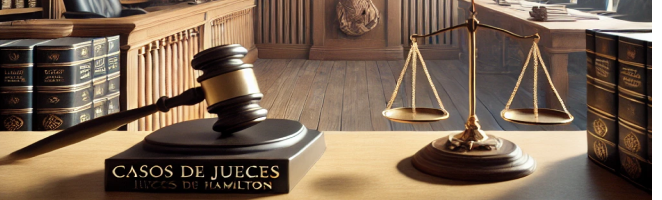 

Aquí tienes una versión más creativa, amigable y con emojis para el caso que vas a resolver en Python. Esto hará que sea más atractivo para compartir en tu GitHub:

---

## **📜 El Juicio de los Jueces de Hamilton ⚖️**  

En el condado de Hamilton, los jueces se enfrentan a una misión titánica: llevar miles de casos cada año. 📂👨‍⚖️👩‍⚖️ Aunque la mayoría de los casos concluyen con una sentencia definitiva, hay ocasiones en que se presentan apelaciones. 📑💥 Algunas de estas apelaciones logran cambiar la sentencia inicial.  

Durante tres años, **Kristen DelGuzzi**, periodista de *The Cincinnati Enquirer*, llevó a cabo una investigación para descubrir cómo desempeñaron su labor 38 jueces en los tribunales de primera instancia, relaciones domésticas y tribunales municipales. 🕵️‍♀️ El estudio recopiló datos de **182,908 casos**. Sin embargo, dos jueces (Dinkelacker y Hogan) no estuvieron activos durante los tres años completos. 🕒  

El objetivo es evaluar el desempeño de los jueces, ya que las apelaciones suelen estar relacionadas con errores cometidos en la sentencia inicial. 🎯 ¿Qué jueces hacen un trabajo impecable? ¿Quién necesita mejorar?  

Tu misión es ayudar en este análisis de datos usando Python 🐍 y tus conocimientos de probabilidad 📊. Los resultados permitirán clasificar a los jueces y analizar las posibilidades de apelación y revocación en los distintos tribunales.  

---

### **🏆 Objetivos del análisis**  

1. **📈 Probabilidades generales**:  
   - Calcular la probabilidad de que un caso sea **apelado** y **revocado** en los distintos tribunales.  
2. **⚖️ Probabilidades individuales por juez**:  
   - Determinar la probabilidad de que un caso sea apelado para cada juez.  
   - Determinar la probabilidad de que un caso sea revocado para cada juez.  
3. **🔄 Probabilidad condicional**:  
   - Calcular la probabilidad de **revocación** dado que un caso fue apelado, para cada juez.  
4. **📋 Clasificación de jueces**:  
   - Clasificar a los jueces de mejor a peor en cada tribunal. Explica los criterios usados para realizar la clasificación.  

---

### **🚀 Contexto adicional**  

Este análisis será el centro de un informe administrativo que evalúe objetivamente el desempeño de los jueces. Con un toque de Python 🐍 y un poco de probabilidad 🎲, estás a punto de descubrir quiénes son los héroes de la justicia en Hamilton ⚖️✨.


In [47]:
from io import StringIO # Esta librerìa la utilizo mucho porque los datos los transcribo de libros de estadìstica para negocios.
g
# Vamos a ignorar los warning 

import warnings
warnings.filterwarnings("ignore") 

In [48]:
import pandas as pd # Librerìa para leer los datos en formato csv.

tribunalprimerainstancia = StringIO("""Juez,CasosDespachados,CasosApelados,CasosRevocados
Fred Cartolano, 3037, 137, 12
Thomas Crush, 3372, 119, 10
Patrick Dinkelacker, 1258, 44,8
Timothy Hogan, 1954, 60 ,7
Robert Kraft, 3138 ,127, 7
William Mathews, 2264 ,91, 18
William Morrissey ,3032, 121, 22
Norbert Nadel, 2959, 131, 20
Arthur Ney Jr., 3219 ,125, 14
Richard Niehaus ,3353 ,137, 16
Thomas Nurre, 3000 ,121, 6
John O’Connor ,2969 ,129,12
Robert Ruehlman ,3205 ,145,18
J. Howard Sundermann ,955 ,60 ,10
Ann Marie Tracey ,3141, 127 ,13
Ralph Winkler, 3089, 88 ,6""")

tribunalprimerainstancia = pd.read_csv(tribunalprimerainstancia)

tribunalMunicipal = StringIO("""Juez,CasosDespachados,CasosApelados,CasosRevocados
MikeAllen,6149,43,4
NadineAllen,7812,34,6
TimothyBlack,7954,41,6
DavidDavis,7736,43,5
LeslieIsaiahGaines,5282,35,13
KarlaGrady,5253,6,0
DeidraHair,2532,5,0
DennisHelmick,7900,29,5
Timothy Hogan,2308,13,2
JamesPatrickKenney,2798,6,1
JosephLuebbers,4698,25,8
WilliamMallory,8277,38,9
MelbaMarsh,8219,34,7
BethMattingly,2971,13,1
AlbertMestemaker,4975,28,9
MarkPainter,2239,7,3
JackRosen,7790,41,13
MarkSchweikert,5403,33,6
DavidStockdale,5371,22,4
JohnA.West,2797,4,2""")

tribunalMunicipal = pd.read_csv(tribunalMunicipal)

tribunalRelacionesDomesticas = StringIO("""Juez,CasosDespachados,CasosApelados,CasosRevocados
Penelope Cunningham ,2729 ,7 ,1
Patrick Dinkelacker, 6001, 19,4
Deborah Gaines ,8799 ,48 ,9
Ronald Panioto ,12970, 32 ,3""")

tribunalRelacionesDomesticas = pd.read_csv(tribunalRelacionesDomesticas)



In [49]:
# Veamos los jueces del tribunal de primera instancia
tribunalprimerainstancia

,Juez,CasosDespachados,CasosApelados,CasosRevocados
0,Fred Cartolano,3037,137,12
1,Thomas Crush,3372,119,10
2,Patrick Dinkelacker,1258,44,8
3,Timothy Hogan,1954,60,7
4,Robert Kraft,3138,127,7
5,William Mathews,2264,91,18
6,William Morrissey,3032,121,22
7,Norbert Nadel,2959,131,20
8,Arthur Ney Jr.,3219,125,14
9,Richard Niehaus,3353,137,16


In [50]:
# Veamos los jueces del tribunal municipal

tribunalMunicipal


,Juez,CasosDespachados,CasosApelados,CasosRevocados
0,MikeAllen,6149,43,4
1,NadineAllen,7812,34,6
2,TimothyBlack,7954,41,6
3,DavidDavis,7736,43,5
4,LeslieIsaiahGaines,5282,35,13
5,KarlaGrady,5253,6,0
6,DeidraHair,2532,5,0
7,DennisHelmick,7900,29,5
8,Timothy Hogan,2308,13,2
9,JamesPatrickKenney,2798,6,1


In [51]:
# Veamos los jueces del tribunal de relaciones domesticas

tribunalRelacionesDomesticas

,Juez,CasosDespachados,CasosApelados,CasosRevocados
0,Penelope Cunningham,2729,7,1
1,Patrick Dinkelacker,6001,19,4
2,Deborah Gaines,8799,48,9
3,Ronald Panioto,12970,32,3


Ahora, un caso particular son los de los jueces que a diferencia de todos han trabajado en diferentes tribunales. Para estos dos jueces, tendremos que trabajar con los casos totales en ambos tribunales. 

# ¿Cuàl es la probabilidad de casos revocados en cada tribunal?

La probabilidad para responder esta pregunta serà la siguiente:

$ Total de casos despachados : D$

$ Total de casos revocados: R$

$ Total de casos apelados: A$:

$ Probabilidad\ de\ revocados : P(R) = R/D $

$ Proabikidad \ de\ apelados: P(A) = A/D $

In [52]:
# Crearemos la funciòn que cree un dataframe para cada tribunal con el total de casos despachados, apelados y revocados.
def total_juicios(tribunal,nombre):
    tribunal = tribunal.loc[:,['CasosDespachados','CasosApelados','CasosRevocados']].apply(lambda x: x.sum(), axis=0).to_frame(name = f"Total {nombre}").T 
    return tribunal

In [53]:
# Definimos las tablas de cada tribunal y luego lo concatenamos
total_RelacionesDomesticas = total_juicios(tribunalRelacionesDomesticas,"RelacionesDomesticas")
total_Municipal = total_juicios(tribunalMunicipal,"Municipal")
total_Primerainstancia = total_juicios(tribunalprimerainstancia,"Primerainstancia")

tabla_total = pd.concat([total_Primerainstancia,total_Municipal,total_RelacionesDomesticas],axis=0)

# Ahora vamos hallar la probabilidad de cada tribunal de que un caso sea apelado,asimismo para casos  revocados.
tabla_total.loc[:,["CasosApelados","CasosRevocados"]] = round(tabla_total.loc[:,["CasosApelados","CasosRevocados"]].apply(lambda x: x/tabla_total["CasosDespachados"], axis=0),4) 

tabla_total.columns = ["Total CasosDespachados","Probabilidad de Casos Apelados","Probabilidad de Casos Revocados"]

tabla_total

,Total CasosDespachados,Probabilidad de Casos Apelados,Probabilidad de Casos Revocados
Total Primerainstancia,43945,0.0401,0.0045
Total Municipal,108464,0.0046,0.0010
Total RelacionesDomesticas,30499,0.0035,0.0006


# ¿Cuàl es la probabilidad de que un juez Apele?¿Cuàl es la probabilidad de que un juez revoque?

# ¿Quiènes son los jueces que màs apelan y revocan?

In [54]:
# Vamos a empezar creando las funciones de probabilidades
# Total de casos : Casos despecahados
# Probabilidad de que un caso sea apelado : Casos apelados / Casos despechados
# Probabilidad de que un caso sea revocado : Casos revocados / Casos despechados
def probabilidad_individual(tribunal):
    
    tabla_probabilidadesIndividuales = tribunal.loc[:,["CasosApelados","CasosRevocados"]].apply(lambda x: x/tribunal["CasosDespachados"])
    tabla_probabilidadesIndividuales.rename(tribunal["Juez"].to_dict(),inplace=True)
    
    
    return tabla_probabilidadesIndividuales

In [55]:
# Tribunal de Primera Instancia
probabilidad_individual(tribunalprimerainstancia)

,CasosApelados,CasosRevocados
Fred Cartolano,0.045110,0.003951
Thomas Crush,0.035291,0.002966
Patrick Dinkelacker,0.034976,0.006359
Timothy Hogan,0.030706,0.003582
Robert Kraft,0.040472,0.002231
William Mathews,0.040194,0.007951
William Morrissey,0.039908,0.007256
Norbert Nadel,0.044272,0.006759
Arthur Ney Jr.,0.038832,0.004349
Richard Niehaus,0.040859,0.004772


In [56]:
# Tribunal Municipal

probabilidad_individual(tribunalMunicipal)

,CasosApelados,CasosRevocados
MikeAllen,0.006993,0.000651
NadineAllen,0.004352,0.000768
TimothyBlack,0.005155,0.000754
DavidDavis,0.005558,0.000646
LeslieIsaiahGaines,0.006626,0.002461
KarlaGrady,0.001142,0.000000
DeidraHair,0.001975,0.000000
DennisHelmick,0.003671,0.000633
Timothy Hogan,0.005633,0.000867
JamesPatrickKenney,0.002144,0.000357


In [57]:
# Tribunal de Relaciones Domesticas

probabilidad_individual(tribunalRelacionesDomesticas)

,CasosApelados,CasosRevocados
Penelope Cunningham,0.002565,0.000366
Patrick Dinkelacker,0.003166,0.000667
Deborah Gaines,0.005455,0.001023
Ronald Panioto,0.002467,0.000231


# ¿Cuàl es la probabilidad de un juez revoque luego de una apelaciòn?

$ Probabilidad condicional: P(R|A) = P(R)/P(A) $

In [58]:
def probabilidad_condicional(tribunal,tabla_probabilidades_individuales):

    tabla_probabilidadesCondicionales = tabla_probabilidades_individuales["CasosRevocados"] / tabla_probabilidades_individuales["CasosApelados"]
    
    return tabla_probabilidadesCondicionales.to_frame(name = "Probabilidad de que un caso sea revocado dado que fue apelado")

In [59]:
# Tribunal de Primera Instancia

tabla_condicional_primerainstancia =  probabilidad_condicional(tribunalprimerainstancia,probabilidad_individual(tribunalprimerainstancia)).sort_values(by="Probabilidad de que un caso sea revocado dado que fue apelado",ascending=False)

tabla_condicional_primerainstancia.reset_index(inplace=True,names="Juez")
tabla_condicional_primerainstancia

,Juez,Probabilidad de que un caso sea revocado dado que fue apelado
0,William Mathews,0.197802
1,Patrick Dinkelacker,0.181818
2,William Morrissey,0.181818
3,J. Howard Sundermann,0.166667
4,Norbert Nadel,0.152672
5,Robert Ruehlman,0.124138
6,Richard Niehaus,0.116788
7,Timothy Hogan,0.116667
8,Arthur Ney Jr.,0.112000
9,Ann Marie Tracey,0.102362


In [60]:
# Tribunal Municipal

tabla_condicional_municipal= probabilidad_condicional(tribunalMunicipal,probabilidad_individual(tribunalMunicipal)).sort_values(by="Probabilidad de que un caso sea revocado dado que fue apelado",ascending=False)
tabla_condicional_municipal.reset_index(inplace=True,names="Juez")
tabla_condicional_municipal

,Juez,Probabilidad de que un caso sea revocado dado que fue apelado
0,JohnA.West,0.500000
1,MarkPainter,0.428571
2,LeslieIsaiahGaines,0.371429
3,AlbertMestemaker,0.321429
4,JosephLuebbers,0.320000
5,JackRosen,0.317073
6,WilliamMallory,0.236842
7,MelbaMarsh,0.205882
8,MarkSchweikert,0.181818
9,DavidStockdale,0.181818


In [61]:
# Tribunal de Relaciones Domesticas

tabla_condicional_relaciones = probabilidad_condicional(tribunalRelacionesDomesticas,probabilidad_individual(tribunalRelacionesDomesticas)).sort_values(by="Probabilidad de que un caso sea revocado dado que fue apelado",ascending=False)

tabla_condicional_relaciones.reset_index(inplace=True,names="Juez")
tabla_condicional_relaciones

,Juez,Probabilidad de que un caso sea revocado dado que fue apelado
0,Patrick Dinkelacker,0.210526
1,Deborah Gaines,0.187500
2,Penelope Cunningham,0.142857
3,Ronald Panioto,0.093750


# Clasificaremos los jueces de los mejores a los peores

##  Casos particulares Patrick Dinkelacker y Timothy Hogan revisaremos el caso de ambos 

Recordemos que ambos jueces trabajaron en diferentes tribunales por eso tienen casos en diferentes tribunales, es por esa razòn que tenemos que sumar sus cados para generalizarlos 

In [62]:
# Dado que Patrick Dinkelacker  y Timoty Hogan, estuvieron en diferentes tribunales

# Vamos a investigar por què 

tribunalprimerainstancia.query("Juez == 'Patrick Dinkelacker'")
tribunalRelacionesDomesticas.query("Juez == 'Patrick Dinkelacker'")
tribunalprimerainstancia.query("Juez == 'Timothy Hogan'")
tribunalMunicipal.query("Juez == 'Timothy Hogan'")

tabla_invest = pd.concat([tribunalprimerainstancia.query("Juez == 'Patrick Dinkelacker'"), tribunalRelacionesDomesticas.query("Juez == 'Patrick Dinkelacker'"), tribunalprimerainstancia.query("Juez == 'Timothy Hogan'"), tribunalMunicipal.query("Juez == 'Timothy Hogan'")])

tabla_invest

,Juez,CasosDespachados,CasosApelados,CasosRevocados
2,Patrick Dinkelacker,1258,44,8
1,Patrick Dinkelacker,6001,19,4
3,Timothy Hogan,1954,60,7
8,Timothy Hogan,2308,13,2


In [63]:
# Vamos a sumar los casos despachados de Patrick Dinkelacker

total_Patrick = tabla_invest.loc[:,["CasosDespachados","CasosApelados","CasosRevocados"]][tabla_invest["Juez"] == "Patrick Dinkelacker"].apply(lambda x: x.sum(),axis = 0).to_frame().T
total_Hogan = tabla_invest.loc[:,["CasosDespachados","CasosApelados","CasosRevocados"]][tabla_invest["Juez"] == "Timothy Hogan"].apply(lambda x: x.sum(),axis = 0).to_frame().T

# Haremos un dataframe con los dos 

total_patrick_hogan = pd.concat([total_Patrick, total_Hogan], axis = 0).reset_index(drop=True)

# añadiremos una columna con el nombre del juez en la primera columna

total_patrick_hogan.insert(0,"Juez",["Patrick Dinkelacker","Timothy Hogan"])
total_patrick_hogan


analisis_especial = probabilidad_condicional(total_patrick_hogan,probabilidad_individual(total_patrick_hogan))  
analisis_especial.reset_index(inplace=True,names="Juez")

# Vamos a quitar a Timothy Hogan de las tablas condicionales porque a ambos le hicimos un analisis especial
tabla_condicional_municipal2 = tabla_condicional_municipal[tabla_condicional_municipal["Juez"] != "Timothy Hogan"]
tabla_condicional_primerainstancia2 = tabla_condicional_primerainstancia[tabla_condicional_primerainstancia["Juez"] != "Timothy Hogan"]
tabla_condicional_relaciones2 = tabla_condicional_relaciones[tabla_condicional_relaciones["Juez"] != "Timothy Hogan"]

# Vamos a quitar a Patrick Dinkelacker de las tablas condicionales porque a ambos le hicimos un analisis especial

tabla_condicional_municipal3 = tabla_condicional_municipal2[tabla_condicional_municipal2["Juez"] != "Patrick Dinkelacker"]
tabla_condicional_primerainstancia3 = tabla_condicional_primerainstancia2[tabla_condicional_primerainstancia2["Juez"] != "Patrick Dinkelacker"]
tabla_condicional_relaciones3 = tabla_condicional_relaciones2[tabla_condicional_relaciones2["Juez"] != "Patrick Dinkelacker"]

# Ahora vamos a unir las tablas condicionales

tabla_condicional_total = pd.concat([tabla_condicional_municipal3.loc[:,["Juez","Probabilidad de que un caso sea revocado dado que fue apelado"]],tabla_condicional_primerainstancia3.loc[:,["Juez","Probabilidad de que un caso sea revocado dado que fue apelado"]],tabla_condicional_relaciones3.loc[:,["Juez","Probabilidad de que un caso sea revocado dado que fue apelado"]],analisis_especial],axis = 0)

tabla_condicional_total = tabla_condicional_total.sort_values(by="Probabilidad de que un caso sea revocado dado que fue apelado",ascending=True)
tabla_condicional_total

,Juez,Probabilidad de que un caso sea revocado dado que fue apelado
19,DeidraHair,0.000000
18,KarlaGrady,0.000000
15,Thomas Nurre,0.049587
14,Robert Kraft,0.055118
13,Ralph Winkler,0.068182
17,BethMattingly,0.076923
12,Thomas Crush,0.084034
11,Fred Cartolano,0.087591
10,John O’Connor,0.093023
16,MikeAllen,0.093023


# Conclusiòn:
- Al parecer el Juen Johna A.West es el peor Juez, ya que tiene mayor probabilidad de que revoque su caso por apelaciòn.
- Ambas juezas como DeidraHair y Karla Grady, no revocan sus casos por apelaciòn


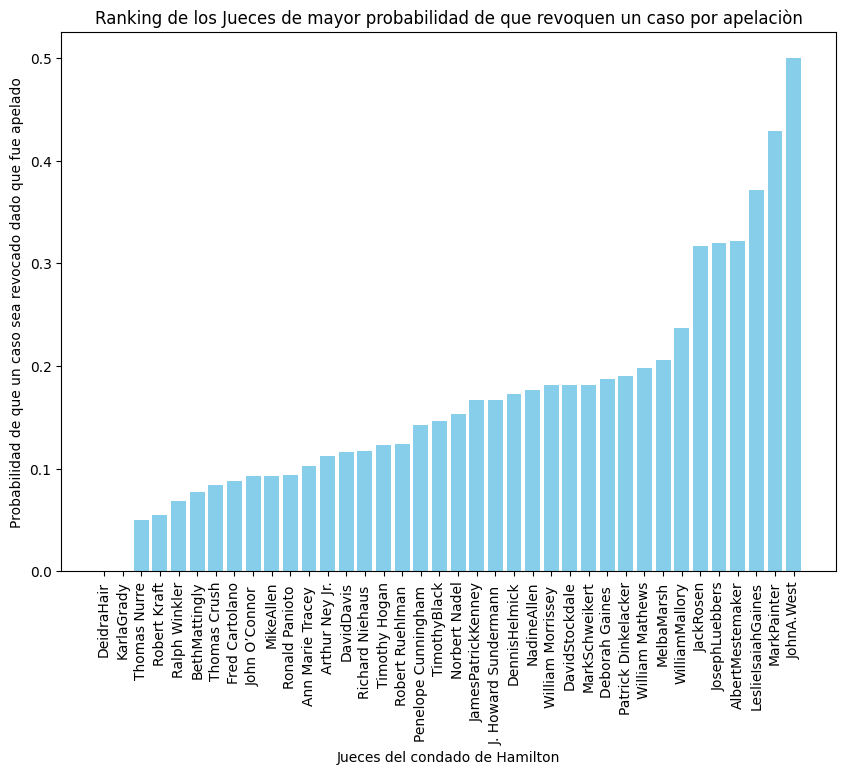

In [64]:
tabla_condicional_total.reset_index(drop=True,inplace=True)

import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(10,7))

ax.bar(tabla_condicional_total["Juez"],tabla_condicional_total["Probabilidad de que un caso sea revocado dado que fue apelado"],color="skyblue")
ax.set_title("Ranking de los Jueces de mayor probabilidad de que revoquen un caso por apelaciòn")
ax.set_xlabel("Jueces del condado de Hamilton")
ax.set_ylabel("Probabilidad de que un caso sea revocado dado que fue apelado")
plt.xticks(rotation=90)
plt.show()

# ¿ Posible paradoja de Simpsons? Hamos un anàlisis general
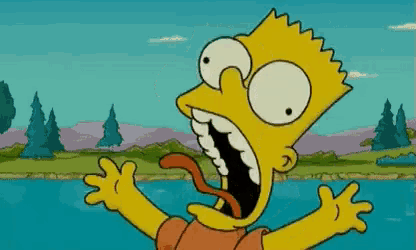

In [65]:
# Vamos a elaborar un sola tabla de las 3 municipales 

tabla_general = pd.concat([tribunalprimerainstancia,tribunalMunicipal,tribunalRelacionesDomesticas],axis=0)


tabla_general = tabla_general[(tabla_general["Juez"] != "Timothy Hogan") & (tabla_general["Juez"] != "Patrick Dinkelacker")]

tabla_general = pd.concat([tabla_general,total_patrick_hogan],axis=0)
tabla_general.reset_index(drop=True,inplace=True)

tabla_general

tabla_general_suma = tabla_general.loc[:,["CasosDespachados","CasosApelados","CasosRevocados"]].apply(lambda x: x.sum(),axis=0).to_frame().T
tabla_general_suma

tabla_general_probabilidad = tabla_general[["Juez"]]

tabla_general_probabilidad["Probabilidad de despacho"] = round(tabla_general["CasosDespachados"]/tabla_general["CasosDespachados"].sum(),4)  
tabla_general_probabilidad["Probabilidad de que el caso despachado sea revocado"] = round(tabla_general["CasosRevocados"]/tabla_general["CasosDespachados"],4)
tabla_general_probabilidad["La probabilidad de que el caso despachado sea apelado"] = round(tabla_general["CasosApelados"]/tabla_general["CasosDespachados"],4)
tabla_general_probabilidad["Probabilidad de apelaciòn"] = round(tabla_general["CasosApelados"]/tabla_general["CasosApelados"].sum(),4)
tabla_general_probabilidad["Probaulidad de que el caso despachado y revocado"] = round(tabla_general_probabilidad["Probabilidad de despacho"]*tabla_general_probabilidad["Probabilidad de que el caso despachado sea revocado"],4)
tabla_general_probabilidad["Probabilidad de revocaciòn"] = round(tabla_general["CasosRevocados"]/tabla_general["CasosRevocados"].sum(),4)

In [66]:
tabla_general_probabilidad.sort_values(by="Probabilidad de revocaciòn",ascending=False)

,Juez,Probabilidad de despacho,Probabilidad de que el caso despachado sea revocado,La probabilidad de que el caso despachado sea apelado,Probabilidad de apelaciòn,Probaulidad de que el caso despachado y revocado,Probabilidad de revocaciòn
4,William Morrissey,0.0166,0.0073,0.0399,0.0511,0.0001,0.0688
5,Norbert Nadel,0.0162,0.0068,0.0443,0.0553,0.0001,0.0625
3,William Mathews,0.0124,0.0080,0.0402,0.0384,0.0001,0.0562
10,Robert Ruehlman,0.0175,0.0056,0.0452,0.0612,0.0001,0.0562
7,Richard Niehaus,0.0183,0.0048,0.0409,0.0579,0.0001,0.0500
6,Arthur Ney Jr.,0.0176,0.0043,0.0388,0.0528,0.0001,0.0438
18,LeslieIsaiahGaines,0.0289,0.0025,0.0066,0.0148,0.0001,0.0406
29,JackRosen,0.0426,0.0017,0.0053,0.0173,0.0001,0.0406
12,Ann Marie Tracey,0.0172,0.0041,0.0404,0.0536,0.0001,0.0406
0,Fred Cartolano,0.0166,0.0040,0.0451,0.0579,0.0001,0.0375
